In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp
%load_ext autoreload
%autoreload 2

file_name = 'ridesharing.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
results_df = pd.read_csv(file_name)


In [27]:

results_df = results_df.dropna(subset="dropoff_time") # drop cars
results_df = results_df[results_df.dropoff_time != -1] # drop passengers that left
results_df = results_df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')


results_df['strategy'] = results_df['strategy'].astype(str)
results_df['travelTime'] = results_df['dropoff_time'] - results_df['pickup_time']
results_df['detour']  = results_df['travelTime'] - results_df['shortest distance'] 




results_df

avgs = results_df.groupby(['strategy', 'num_drivers'])['detour'].mean().reset_index()

avgs_df = pd.DataFrame(avgs)
groups = (avgs_df.groupby(['strategy']))
display(avgs_df)



,strategy,num_drivers,detour
0,StepType.CLOSEST,1,0.526846
1,StepType.CLOSEST,2,0.239137
2,StepType.CLOSEST,3,0.073569
3,StepType.CLOSEST,4,0.045588
4,StepType.CLOSEST,5,0.038169
5,StepType.QUEUE,1,0.732549
6,StepType.QUEUE,2,0.246226
7,StepType.QUEUE,3,0.073040
8,StepType.QUEUE,4,0.043996
9,StepType.QUEUE,5,0.039900


C:\Users\lokhe\AppData\Local\Temp\ipykernel_18472\1988882414.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


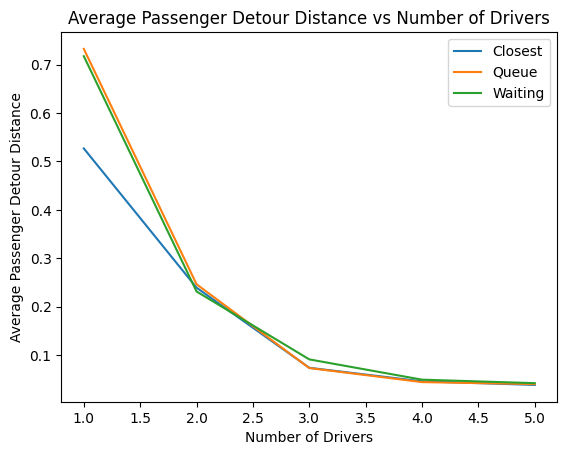

In [11]:

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['num_drivers'], group['detour'], label=name)

ax.legend()

ax.set_xlabel('Number of Drivers')
ax.set_ylabel(f'Average Passenger Detour Distance')
ax.set_title(f'Average Passenger Detour Distance vs Number of Drivers')

plt.legend(['Closest', 'Queue', 'Waiting'], loc='upper right')

plt.savefig(f'figures/detour/detour_dist.png')


c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

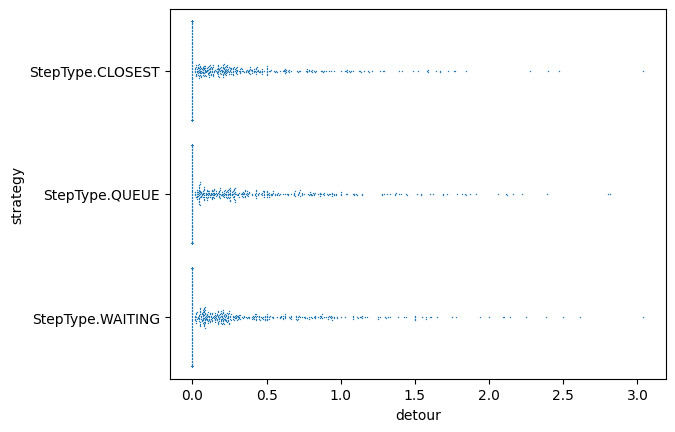

In [12]:

n=2

avgs_by_agent = results_df.groupby(['strategy', 'num_drivers', "sec_id"])['detour'].mean().reset_index()
# display(avgs_by_agent)
# avgs_df = pd.DataFrame(avgs)
n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]
sns.swarmplot(x="detour", y="strategy", data=avgs_by_agent, size=1)
plt.savefig(f'figures/detour/swarm_{n}.png')


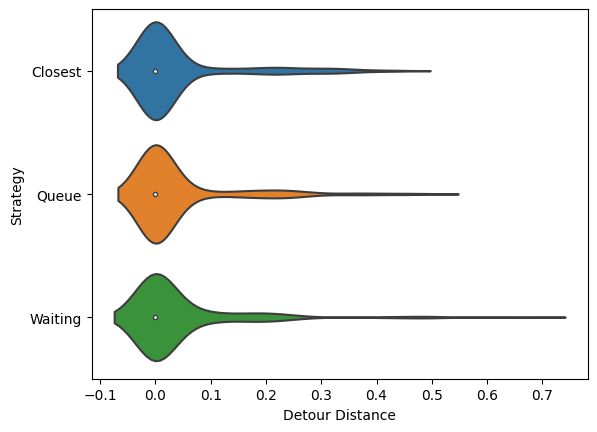

In [26]:
n=5

avgs_by_agent = results_df.groupby(['strategy', 'num_drivers', "sec_id"])['detour'].mean().reset_index()
n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]


ax = sns.violinplot(x="detour", y="strategy", data=n_car, size=1)
ax.set_yticklabels(['Closest', 'Queue', 'Waiting'])
ax.set_xlabel("Detour Distance")
ax.set_ylabel("Strategy")
plt.savefig(f'figures/detour/violin_{n}.png')

<AxesSubplot: xlabel='detour', ylabel='strategy'>

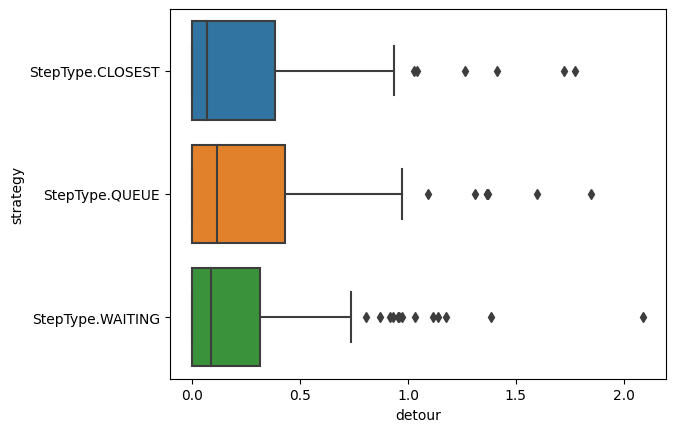

In [14]:
n=2
avgs_by_agent = results_df.groupby(['strategy', 'num_drivers', "sec_id"])['detour'].mean().reset_index()
n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]
sns.boxplot(x="detour", y="strategy", data=n_car)


# plt.savefig(f'figures/box_{n}.png')

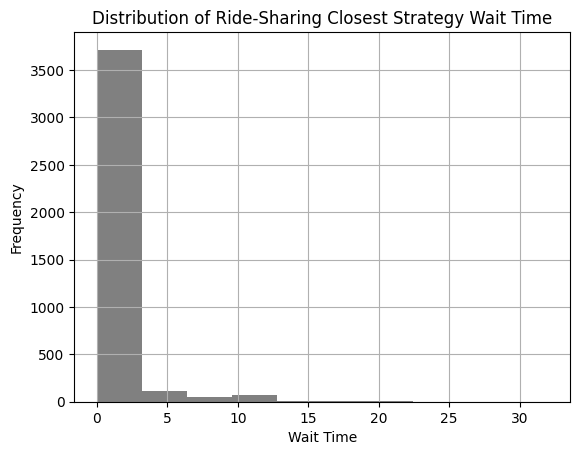

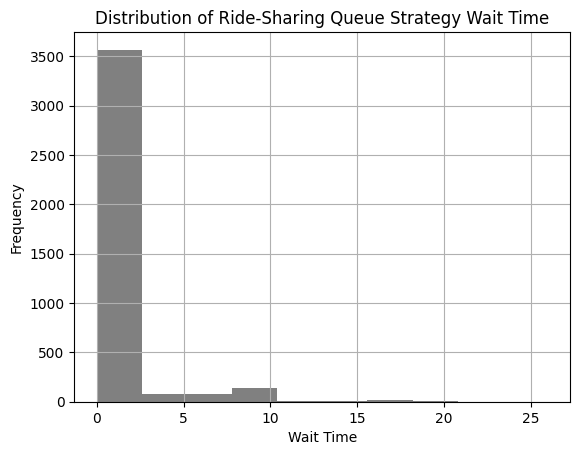

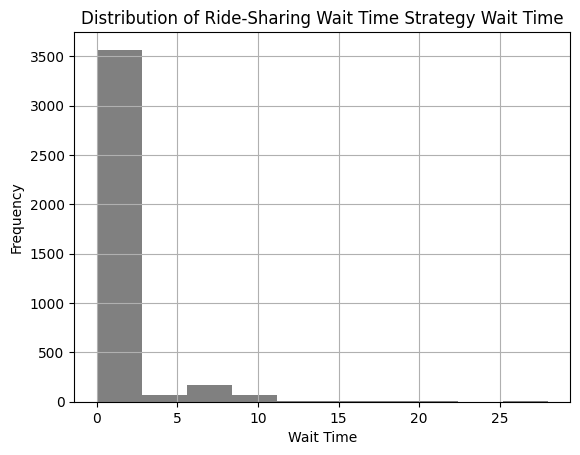

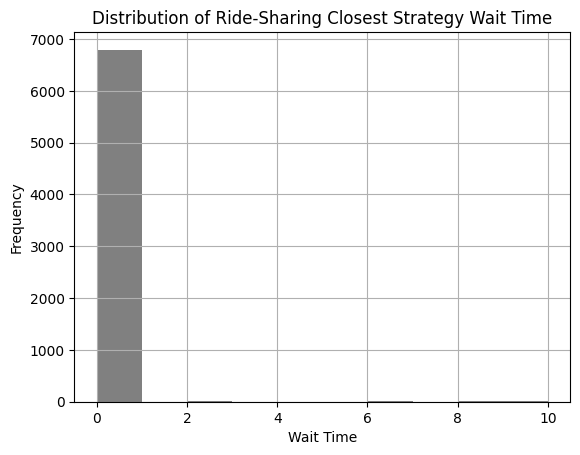

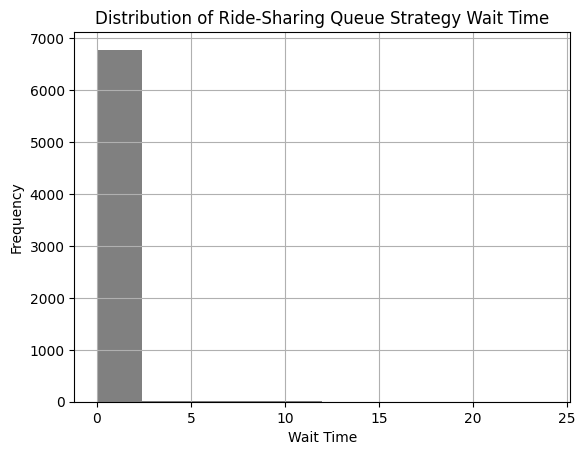

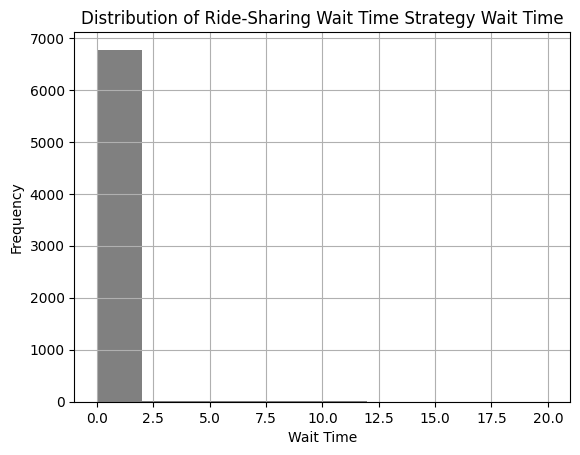

In [15]:
# HISTOGRAMS

labels = ['Wait Time']

for n in [1,5]:
    n_car = results_df[results_df["num_drivers"]== n]

    closest = n_car[n_car["strategy"] == "StepType.CLOSEST"]
    queue = n_car[n_car["strategy"] == "StepType.QUEUE"]
    waiting = n_car[n_car["strategy"] == "StepType.WAITING"]

    closest.hist(column='detour', color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Closest Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_closest_{n}.png')


    queue.hist(column='detour',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Queue Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_queue_{n}.png')


    waiting.hist(column='detour',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Wait Time Strategy {labels[0]}")
    # plt.savefig(f'figures/{labels[0]}_waiting_{n}.png')

    # plt.show()

## stats testing

In [16]:
for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        group = results_df[(results_df["strategy"] == strategy) & (results_df["num_drivers"] == i)]

        
        stat, p = shapiro(group["detour"])

        # Print the test statistic and p-value
        print("Shapiro-Wilk test statistic:", stat)
        print("p-value:", p)
        if p < 0.05:
            print("Reject", strategy, i)

Shapiro-Wilk test statistic: 0.2630500793457031
p-value: 0.0
Reject StepType.CLOSEST 1
Shapiro-Wilk test statistic: 0.16055071353912354
p-value: 0.0
Reject StepType.CLOSEST 2
Shapiro-Wilk test statistic: 0.08031696081161499
p-value: 0.0
Reject StepType.CLOSEST 3
Shapiro-Wilk test statistic: 0.044612109661102295
p-value: 0.0
Reject StepType.CLOSEST 4
Shapiro-Wilk test statistic: 0.04408186674118042
p-value: 0.0
Reject StepType.CLOSEST 5
Shapiro-Wilk test statistic: 0.3357110619544983
p-value: 0.0
Reject StepType.QUEUE 1
Shapiro-Wilk test statistic: 0.1560899019241333
p-value: 0.0
Reject StepType.QUEUE 2
Shapiro-Wilk test statistic: 0.07932442426681519
p-value: 0.0
Reject StepType.QUEUE 3
Shapiro-Wilk test statistic: 0.05241435766220093
p-value: 0.0
Reject StepType.QUEUE 4
Shapiro-Wilk test statistic: 0.039707720279693604
p-value: 0.0
Reject StepType.QUEUE 5
Shapiro-Wilk test statistic: 0.32700878381729126
p-value: 0.0
Reject StepType.WAITING 1
Shapiro-Wilk test statistic: 0.167199313640

c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:

for i in range(1,6):
    group1 = results_df[(results_df["strategy"] == "StepType.CLOSEST") & (results_df["num_drivers"] == i)]['detour']
    group2 = results_df[(results_df["strategy"] == "StepType.QUEUE") & (results_df["num_drivers"] == i)]['detour']
    group3 = results_df[(results_df["strategy"] == "StepType.WAITING") & (results_df["num_drivers"] == i)]['detour']

    stat, p = kruskal(group1, group2, group3)

    print('Statistics=%.3f, p=%f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Samples look to be drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples look to be drawn from different distributions (reject H0)')

Statistics=31.257, p=0.000000
Samples look to be drawn from different distributions (reject H0)
Statistics=0.662, p=0.718264
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=0.853, p=0.652947
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=1.616, p=0.445765
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=0.558, p=0.756506
Samples look to be drawn from the same distributions (fail to reject H0)


In [29]:
# posthoc analysus - pairwise t test use dunns test for non-parametric data
data = results_df[(results_df["num_drivers"] == 1)]

p_values= sp.posthoc_dunn(data,val_col='detour', group_col='strategy', p_adjust = 'bonferroni')
 
print(p_values)


                  StepType.CLOSEST  StepType.QUEUE  StepType.WAITING
StepType.CLOSEST      1.000000e+00    6.080276e-07          0.000038
StepType.QUEUE        6.080276e-07    1.000000e+00          1.000000
StepType.WAITING      3.767196e-05    1.000000e+00          1.000000
